# Anomaly Detection and Recommender Systems

## Anomaly Detection

In [1]:
%matplotlib inline
# To get nice quality plots
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

### Read Data

In [3]:
data1 = loadmat('data/ex8data1.mat')
X1 = data1['X']
print(X1.shape)

(307, 2)


### Plot Data

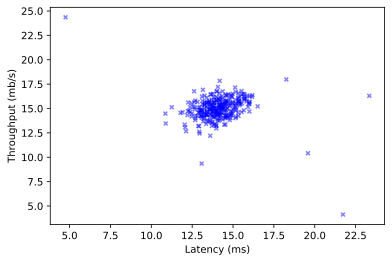

In [4]:
plt.scatter(X1[:,0], X1[:,1], c='b', marker='x',s = 15, alpha = 0.5)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

In [5]:
def estimate_gaussian(X):
    m = X.shape[0]
    mu = (1/m)*np.sum(X, axis=0)
    sigma2 = (1/m) * np.sum((X - mu) ** 2, axis = 0)
    return mu, sigma2

In [6]:
# Calculate data means and data variances
mu_1, sigma2_1 = estimate_gaussian(X1)
sigma2_1.shape
X1.shape

(307, 2)

### Perform Detection

In [7]:
def multi_variate_gaussian(X, mu, sigma2):
    '''Computes the probability density function of the
       multivariate gaussian distribution'''
    k = len(mu)
    Xn = X - mu
    if sigma2.ndim == 1:
        sigma2 = np.diag(sigma2)
    return (2 * np.pi) ** (- k/2) * np.linalg.det(sigma2) ** (- 0.5) * \
            np.exp(-0.5 * np.sum((Xn ** 2) @ np.linalg.pinv(sigma2), axis = 1))

In [8]:
# Calculate probability density function values for input data
p = multi_variate_gaussian(X1, mu_1, sigma2_1)

In [9]:
def visualize_fit(X, mu, sigma2):
    # Create the grid for plotting
    xx, yy = np.meshgrid(np.linspace(0, 30, 200), np.linspace(0, 30, 200))
    Z = multi_variate_gaussian(np.c_[xx.ravel(), yy.ravel()], mu, sigma2)
    Z = Z.reshape(xx.shape)
    # Plot data
    plt.figure(figsize=(5,5))
    plt.axis('equal')
    plt.scatter(X[:,0], X[:,1], c='b', marker='x',s = 15, alpha = 0.5)
    levels = np.array([10 ** x for x in np.arange(-20.0, 0.0, 3.0)])
    if (np.sum(np.isinf(Z)) == 0):
        plt.contour(xx, yy, Z, levels)
   

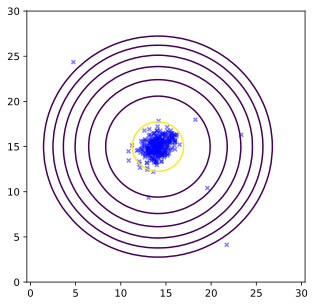

In [10]:
# Visualize the fit of the model
visualize_fit(X1, mu_1, sigma2_1)

## Recommender Systems

In [16]:
# TBD